In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# $\chi^2$ Distribution

In [2]:
from scipy.stats import chi2
from scipy.special import gamma

## Introduction

A **chi-square random variable** is a non-negative random variable that is the sum of the squares of $k$ independent **standard normal random variables** ($Z\sim\mathcal{N}(0, 1)$), represented as 
$$X^{2}=Z_{1}^{2}+Z_{2}^{2}+\dots +Z_{k}^{2}.$$
It is characterized by a single parameter, the **degrees of freedom** ($df$), which is equal to $k$. 

## Distribution

### $\Gamma$ function

The **gamma function**, denoted as $\Gamma (z)$, is a generalization of the factorial function to real and complex numbers. 

It is defined by the integral 

$$\Gamma (z)=\int_{0}^{\infty}t^{z-1}e^{-t}dt$$

for complex numbers with a positive real part. 

For a positive integer $n$, $\Gamma (n+1)=n!$, and the function satisfies the property $\Gamma (z+1)=z\Gamma (z)$. 

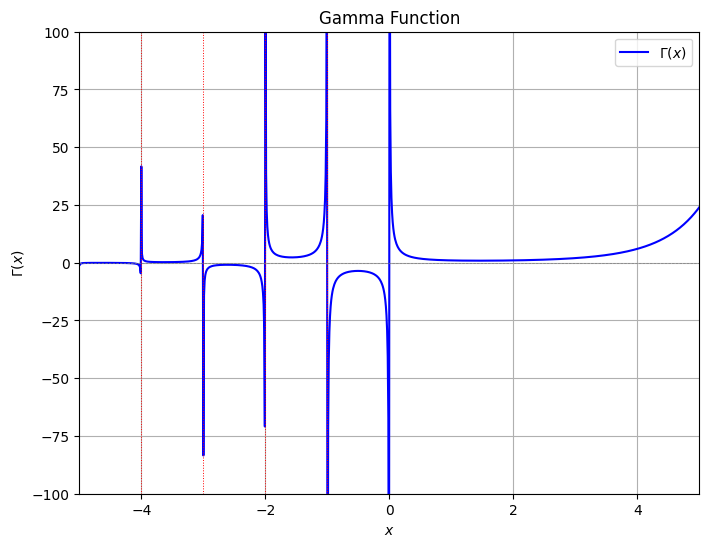

In [15]:
x = np.linspace(-5, 5, 1000)
y = gamma(x)
# Create the plot
plt.figure(figsize=(8, 6)) # Set figure size for better visualization
plt.plot(x, y, label=r'$\Gamma(x)$', color='blue') # Plot the gamma function

# Add a horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
# Add vertical lines at negative integers to highlight discontinuities
for i in range(-4, 0):
    plt.axvline(i, color='red', linestyle=':', linewidth=0.7)
# Set plot limits to focus on the interesting regions
plt.ylim(-100, 100)
plt.xlim(-5, 5)

# Add labels and title
plt.xlabel('$x$')
plt.ylabel(r'$\Gamma(x)$')
plt.title('Gamma Function')
plt.legend()
plt.grid(True) # Add a grid for better readability

# Display the plot
plt.show()

The probability density function (pdf) of the chi-squared distribution is
$$f(x, k) = \left\{\begin{matrix}
\frac{x^{k/2-1}e^{-x/2}}{2^{k/2}\Gamma \big(\frac{k}{2}\big)}, & x > 0 \\
 0, &  \text{otherwise}\\
\end{matrix}\right.$$

### Code

In [23]:
df = 7

In [5]:
# Calculate CDF at a specific value
cdf_at_6 = chi2.cdf(6, df=df)
print(f"CDF at x=6: {cdf_at_6}")

CDF at x=6: 0.4602506496044429


In [6]:
# Calculate PPF (quantile function)
# This finds the value x for which the CDF is equal to a given probability
ppf_value = chi2.ppf(0.95, df=df)
print(f"95th percentile: {ppf_value}")

95th percentile: 14.067140449340169


## Visualization

### Histplot

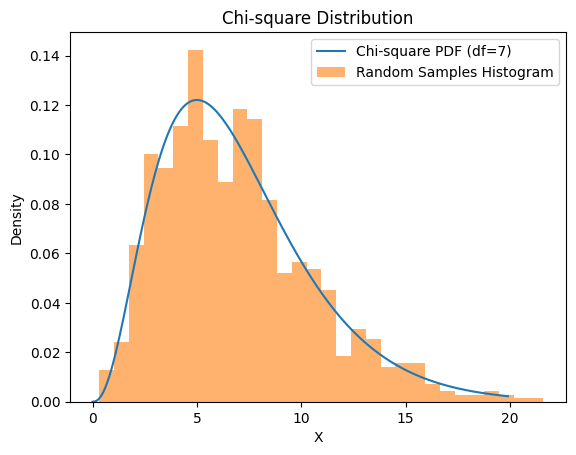

In [26]:
df = 7
# Generate random deviates using scipy.stats
random_deviates = chi2.rvs(df=df, size=1000)

# Calculate PDF at specific values
x_values = np.arange(0, 20, 0.1)
pdf_values = chi2.pdf(x_values, df=df)

# Plotting the PDF and a histogram of generated samples
plt.plot(x_values, pdf_values, label=f'Chi-square PDF (df={df})')
plt.hist(random_deviates, bins=30, density=True, alpha=0.6, label='Random Samples Histogram')
plt.title('Chi-square Distribution')
plt.xlabel('X')
plt.ylabel('Density')
plt.legend()
plt.show()

Chi squared is a continuous, right-skewed distribution, always $\geq0$, with $k$ degrees of freedom.

### Degree of Freedom

In [21]:
x_values = np.arange(0, 40, 0.1)
data = pd.DataFrame({'x': x_values})
for degreeFreedom in np.arange(7, 21):
    data[degreeFreedom]=chi2.pdf(x_values, df=degreeFreedom)
    
chi_df = pd.melt(data, id_vars=['x'], value_vars=list(np.arange(7, 21)), var_name="degree_of_freedom", value_name="pdf")

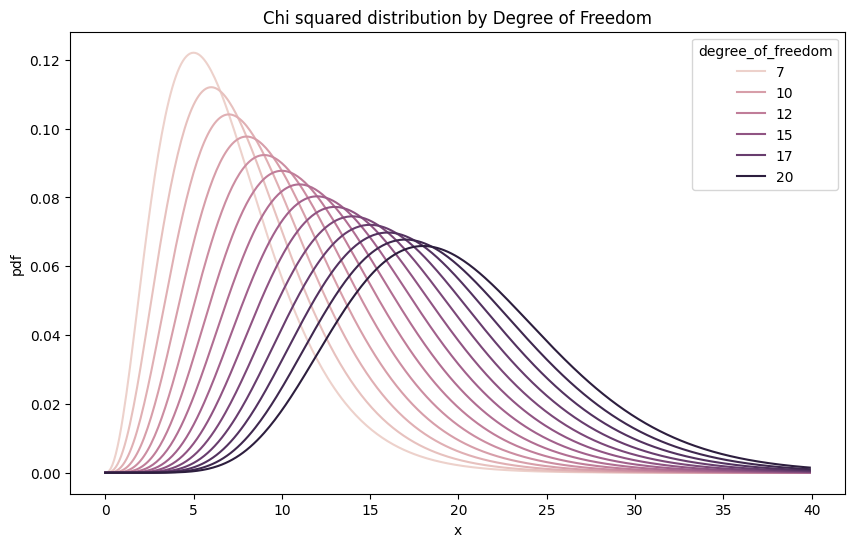

In [22]:
# Plotting 'pdf' over 'x' for each 'degree_of_freedom'
plt.figure(figsize=(10, 6))
sns.lineplot(data=chi_df, x="x", y="pdf", hue="degree_of_freedom")

plt.title("Chi squared distribution by Degree of Freedom")
plt.show()

- The shape of the distribution is determined by this parameter, which represents the number of independent variables summed.

- The distribution is non-negative and highly right-skewed, particularly with fewer degrees of freedom. As the degrees of freedom increase, it approaches a normal distribution.